In [2]:
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Chargement des datasets
def load_datasets():
    datasetA, metaA = arff.loadarff(open('R15.arff','r'))
    datasetB, metaB = arff.loadarff(open('cluto-t8-8k.arff','r'))
    datasetC, metaC = arff.loadarff(open('spiralsquare.arff','r'))
    datasetD, metaD = arff.loadarff(open('elly-2d10c13s.arff','r'))
    datasetE, metaE = arff.loadarff(open('cure-t2-4k.arff','r'))
    datasetF, metaF = arff.loadarff(open('square5.arff','r'))
    datasetG, metaG = arff.loadarff(open('rings.arff','r'))
    datasetH, metaH = arff.loadarff(open('disk-1000n.arff','r'))
    datasetI, metaI = arff.loadarff(open('complex8.arff','r'))
    datasetJ, metaJ = arff.loadarff(open('complex9.arff','r'))
    
    return ([datasetA, datasetB, datasetC, datasetD, datasetE, datasetF, datasetG, datasetH, datasetI, datasetJ],[metaA, metaB, metaC, metaD, metaE, metaF, metaG, metaH, metaI, metaJ])

In [3]:
data, metadata = load_datasets()

In [3]:
### Agglomerative clustering iteratif
def agglo_iteratif(dataset, comb, nb_max=50):
    
    duration = []
    sil_score = []
    db_score = []
    chi_score = []
    alabels = []

    X = [[x,y] for (x,y,c) in dataset]

    for k in range(2,nb_max):
        start_time = time.time()
        agglo = AgglomerativeClustering(n_clusters=k, linkage=comb).fit(X)
        elapsed = time.time() - start_time
        labels = agglo.labels_
        alabels.append(labels)
        sil = metrics.silhouette_score(X, labels)
        db = metrics.davies_bouldin_score(X, labels)
        chi = metrics.calinski_harabaz_score(X, labels)
        sil_score.append(sil)
        db_score.append(db)
        chi_score.append(chi)
        duration.append(elapsed)

    best_k_sil = sil_score.index(max(sil_score)) + 2
    best_k_db = db_score.index(min(db_score)) + 2
    best_k_chi = chi_score.index(max(chi_score)) + 2

    plt.plot(range(2,nb_max),sil_score,label = "silhouette coefficient")
    plt.plot(range(2,nb_max),db_score,label = "DB index")
    plt.xlabel('k')
    plt.ylabel('score')
    plt.legend()
    plt.title("Score with silhouette coefficient and DB index")
    plt.show()

    plt.plot(range(2,nb_max),chi_score,label = "Calinski and Harabasz index")
    plt.xlabel('k')
    plt.ylabel('score')
    plt.legend()
    plt.title("Score with Calinski and Harabasz index")
    plt.show()

    plt.plot(range(2,nb_max),duration, label = "Execution time")
    plt.xlabel('k')
    plt.ylabel('time')
    plt.title("Execution time")
    plt.show()
      
    return ((best_k_sil, best_k_db, best_k_chi),alabels)

Dataset: R15
	x's type is numeric
	y's type is numeric
	class's type is nominal, range is ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15')

Linkage: ward


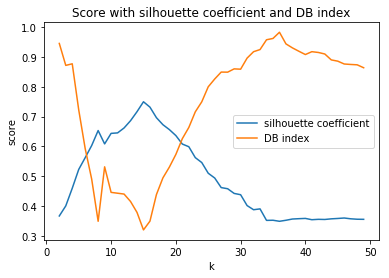

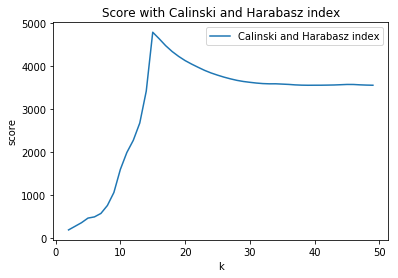

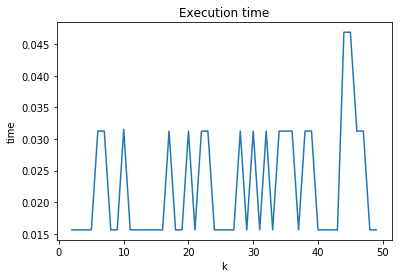

best k with silhouette coefficient:  15
best k with DB index:  15
best k with Calinski and Harabasz index:  15


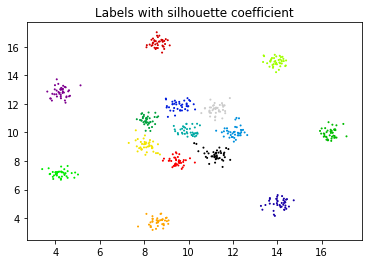

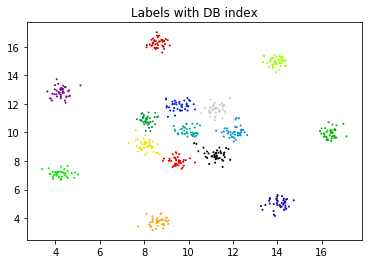

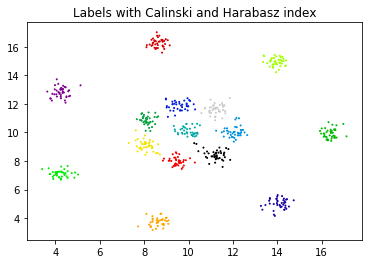

Linkage: single


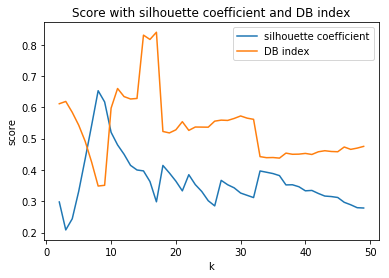

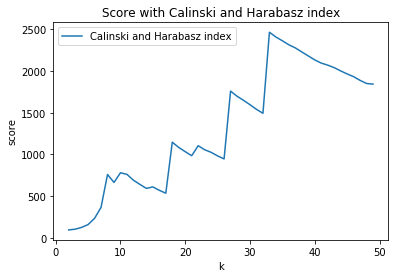

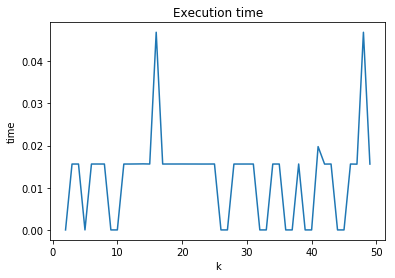

best k with silhouette coefficient:  8
best k with DB index:  8
best k with Calinski and Harabasz index:  33


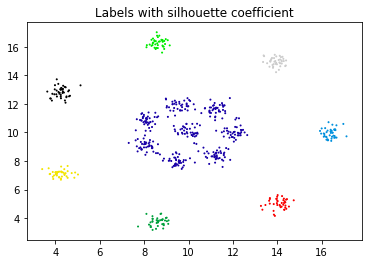

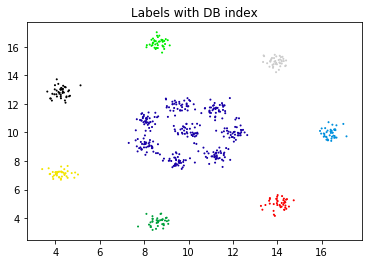

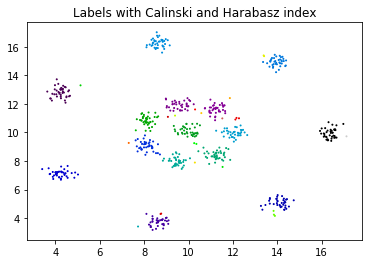

Linkage: average


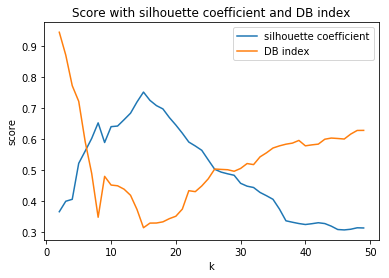

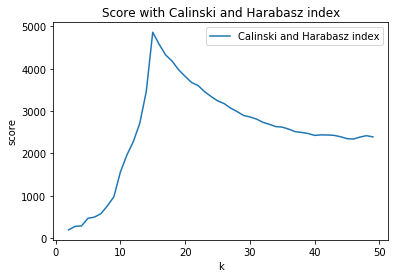

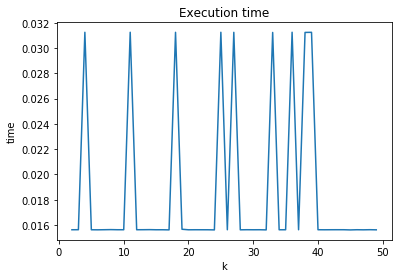

best k with silhouette coefficient:  15
best k with DB index:  15
best k with Calinski and Harabasz index:  15


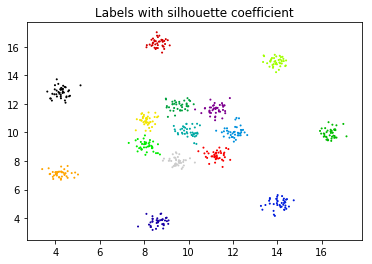

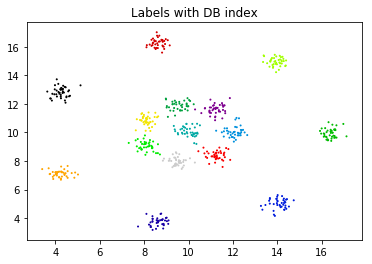

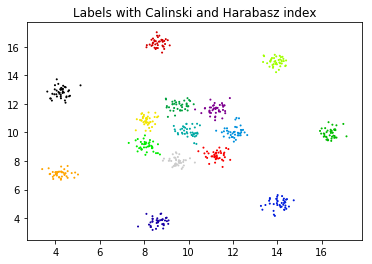

Linkage: complete


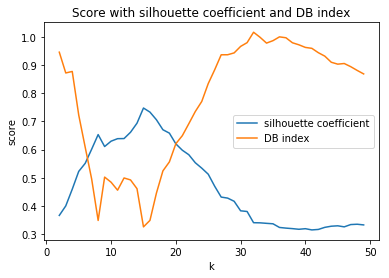

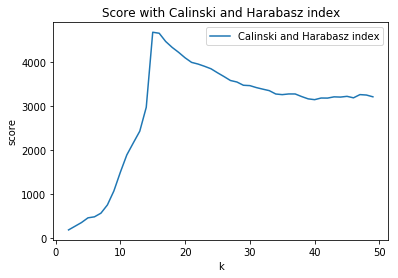

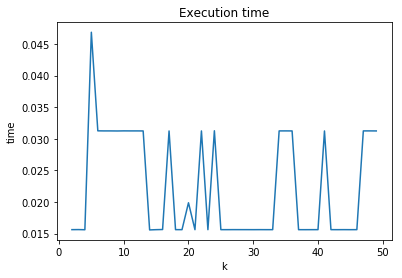

best k with silhouette coefficient:  15
best k with DB index:  15
best k with Calinski and Harabasz index:  15


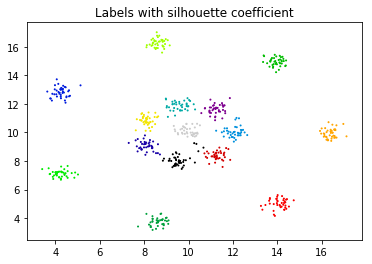

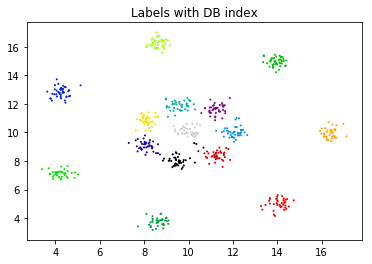

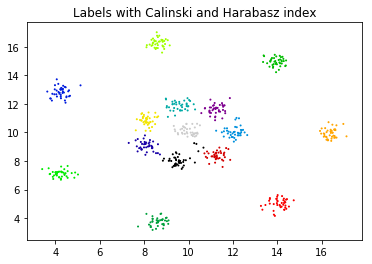

Dataset: cluto-t8-8k
	x's type is numeric
	y's type is numeric
	CLASS's type is nominal, range is ('0', '1', '2', '3', '4', '5', '6', '7', 'noise')

Linkage: ward


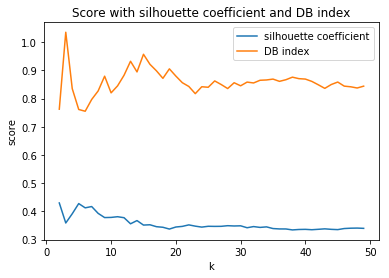

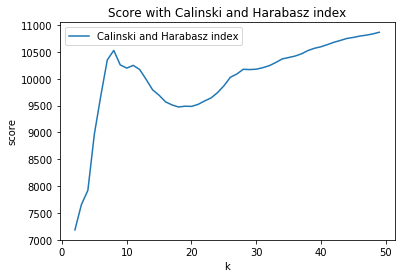

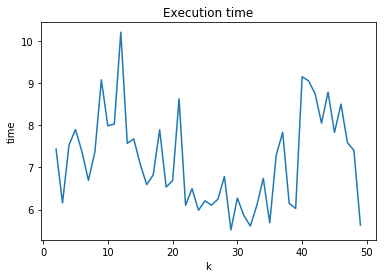

best k with silhouette coefficient:  2
best k with DB index:  6
best k with Calinski and Harabasz index:  49


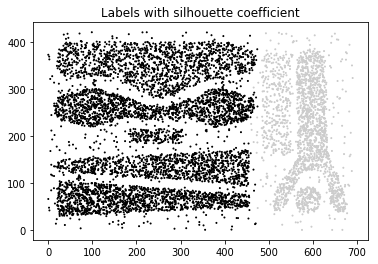

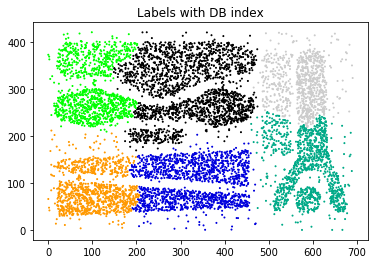

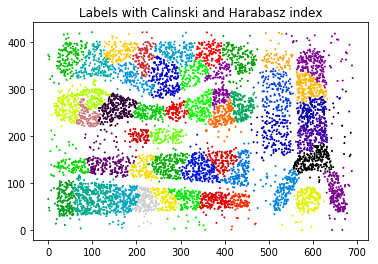

Linkage: single


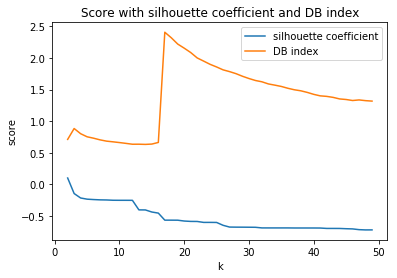

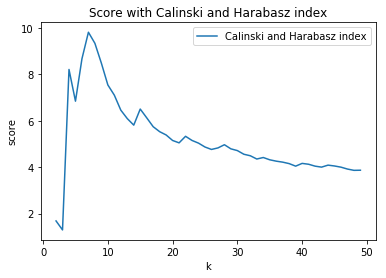

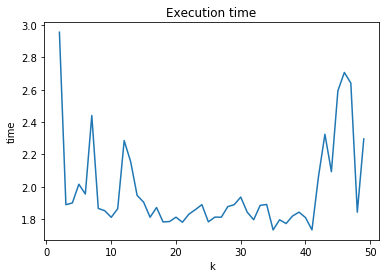

best k with silhouette coefficient:  2
best k with DB index:  14
best k with Calinski and Harabasz index:  7


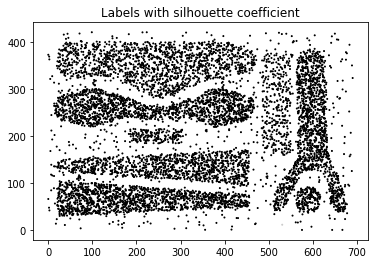

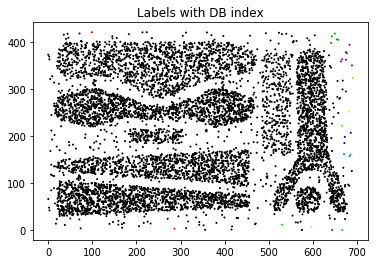

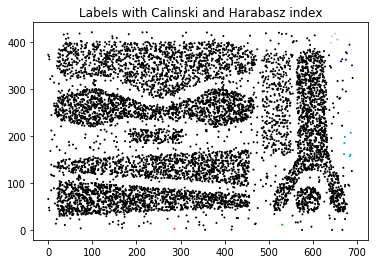

Linkage: average


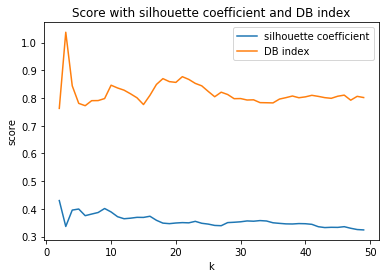

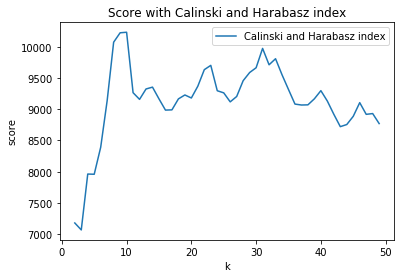

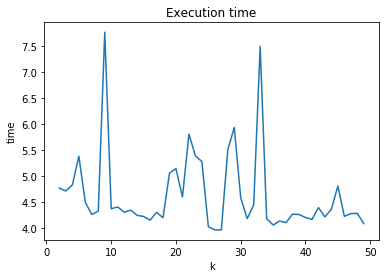

best k with silhouette coefficient:  2
best k with DB index:  2
best k with Calinski and Harabasz index:  10


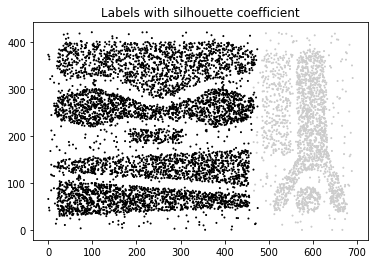

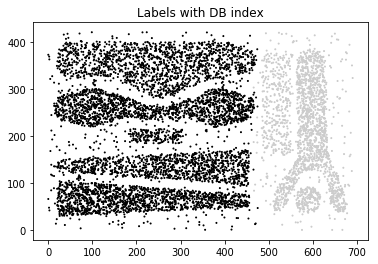

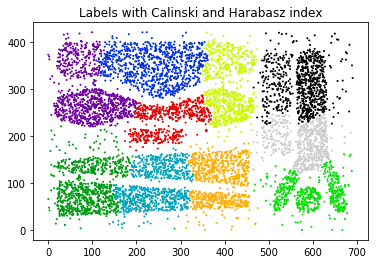

Linkage: complete


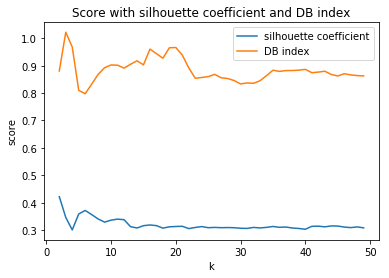

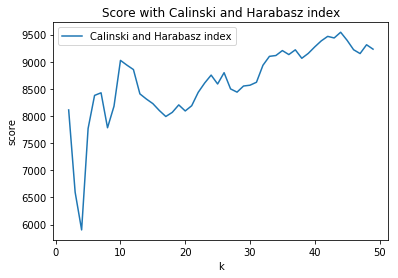

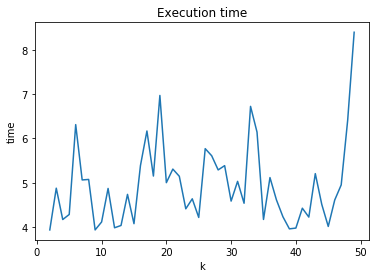

best k with silhouette coefficient:  2
best k with DB index:  6
best k with Calinski and Harabasz index:  44


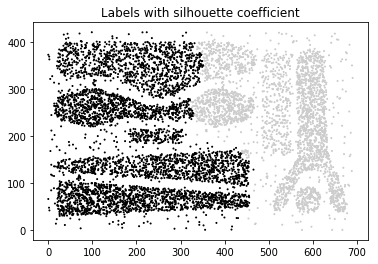

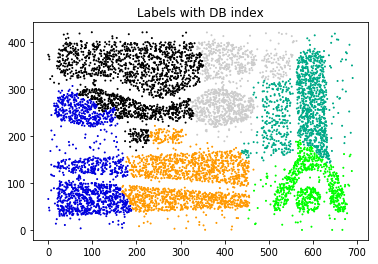

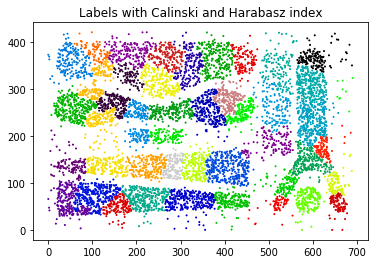

Dataset: spiralsquare
	a0's type is numeric
	a1's type is numeric
	CLASS's type is nominal, range is ('0', '1', '2', '3', '4', '5')

Linkage: ward


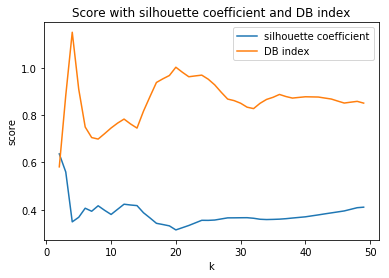

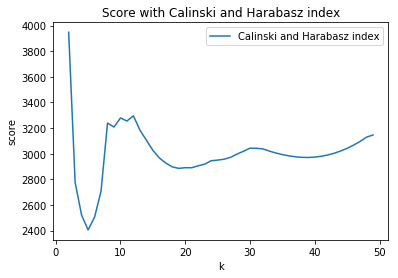

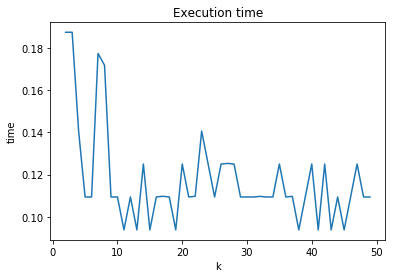

best k with silhouette coefficient:  2
best k with DB index:  2
best k with Calinski and Harabasz index:  2


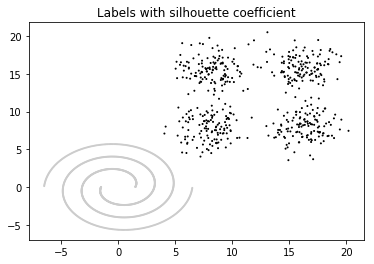

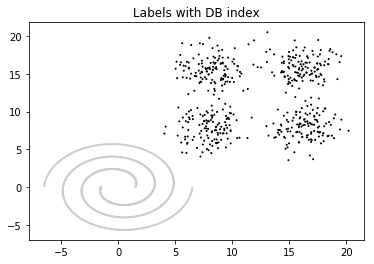

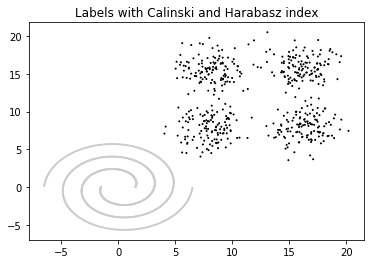

Linkage: single


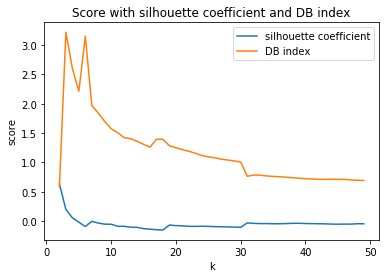

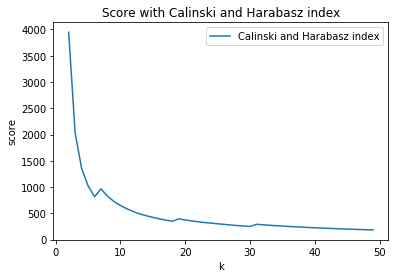

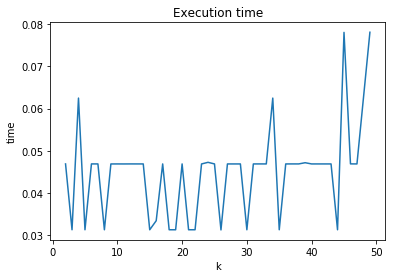

best k with silhouette coefficient:  2
best k with DB index:  2
best k with Calinski and Harabasz index:  2


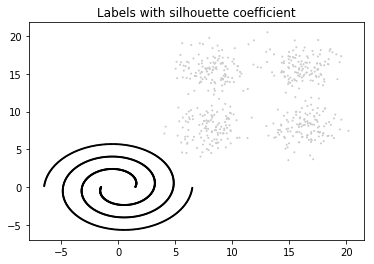

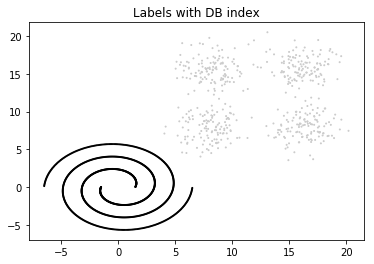

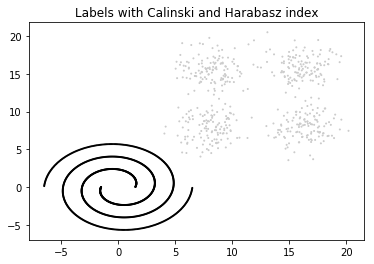

Linkage: average


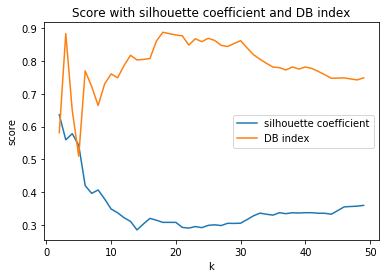

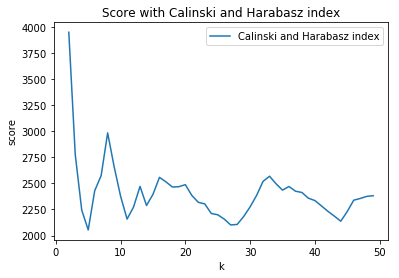

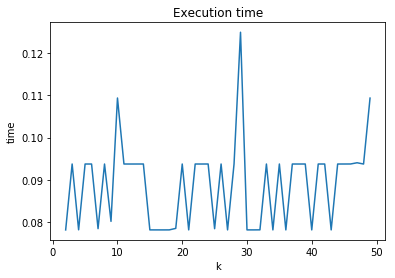

best k with silhouette coefficient:  2
best k with DB index:  5
best k with Calinski and Harabasz index:  2


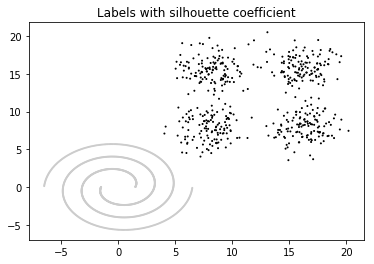

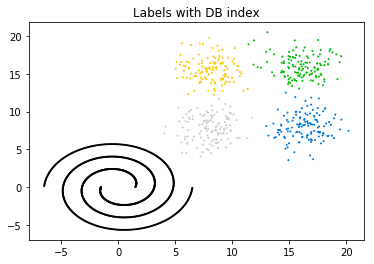

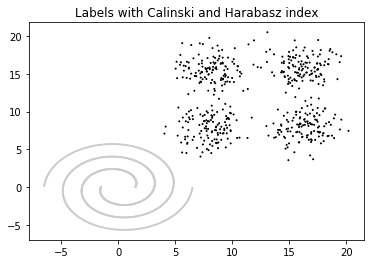

Linkage: complete


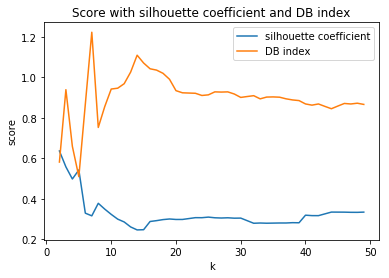

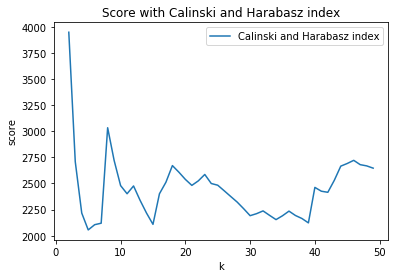

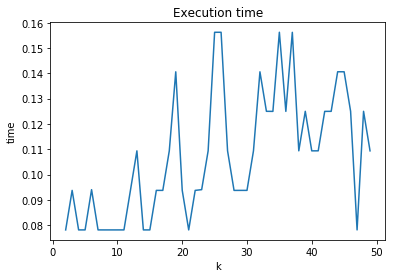

best k with silhouette coefficient:  2
best k with DB index:  5
best k with Calinski and Harabasz index:  2


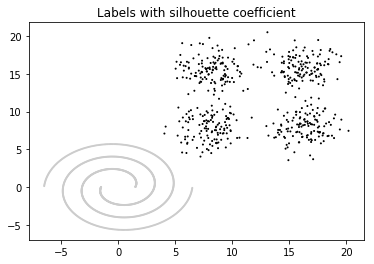

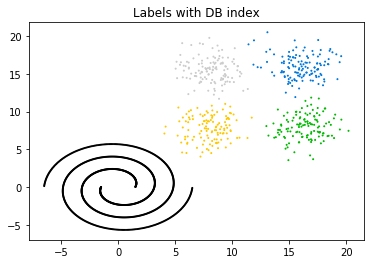

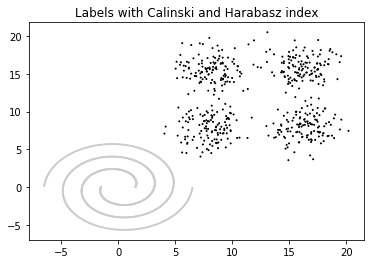

Dataset: elly-2d5c13s
	x's type is numeric
	y's type is numeric
	class's type is nominal, range is ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

Linkage: ward


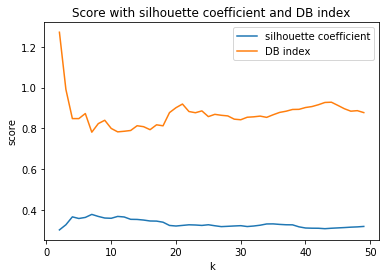

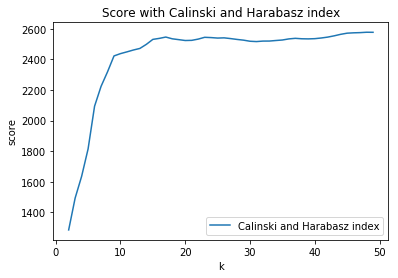

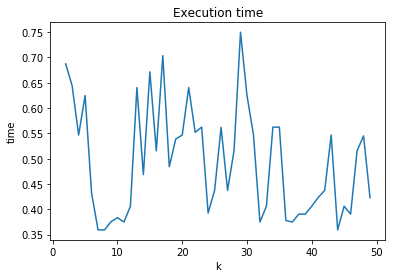

best k with silhouette coefficient:  7
best k with DB index:  7
best k with Calinski and Harabasz index:  48


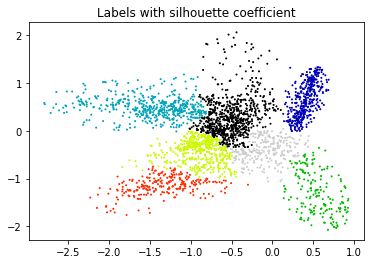

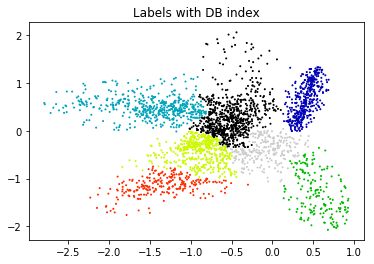

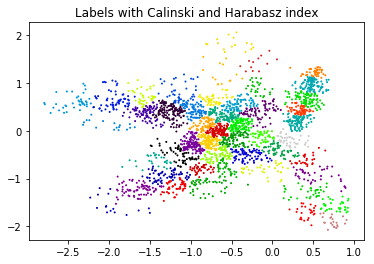

Linkage: single


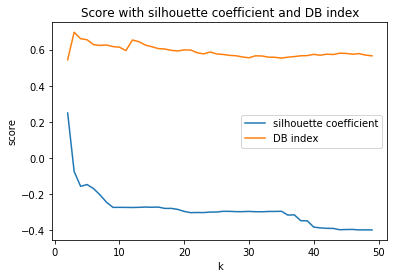

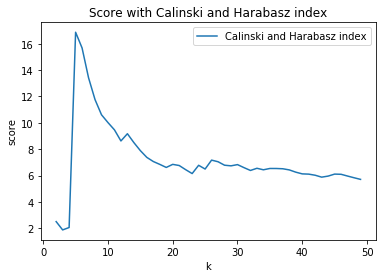

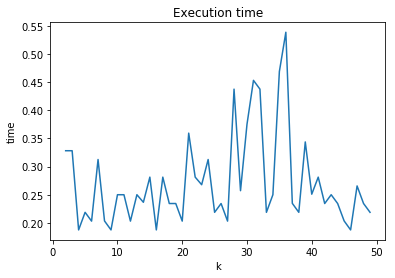

best k with silhouette coefficient:  2
best k with DB index:  2
best k with Calinski and Harabasz index:  5


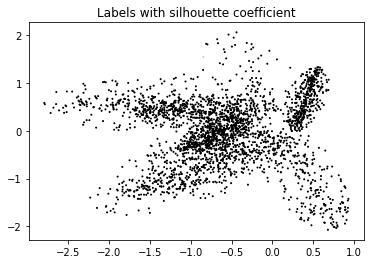

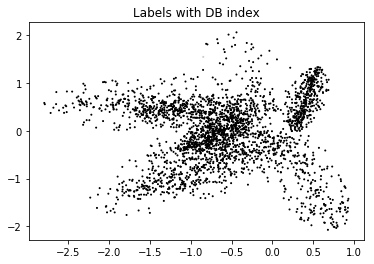

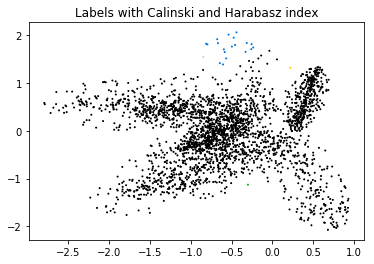

Linkage: average


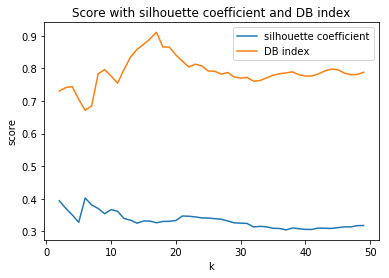

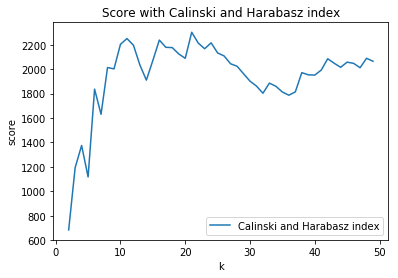

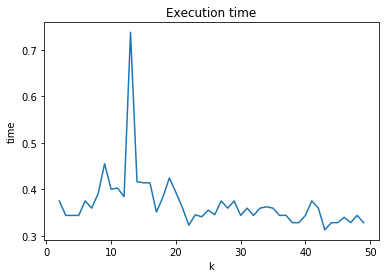

best k with silhouette coefficient:  6
best k with DB index:  6
best k with Calinski and Harabasz index:  21


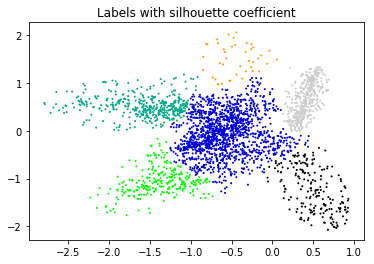

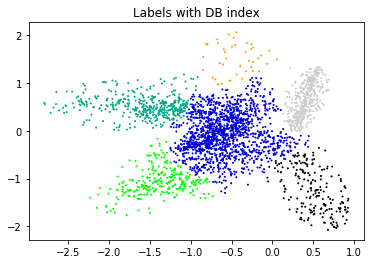

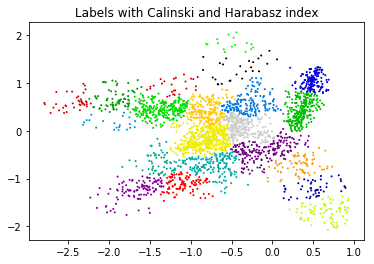

Linkage: complete


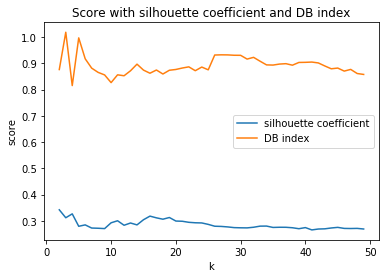

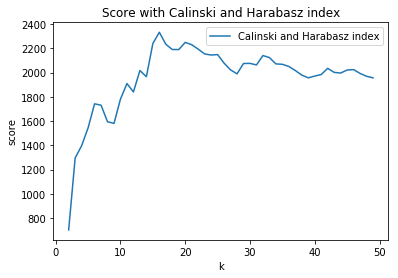

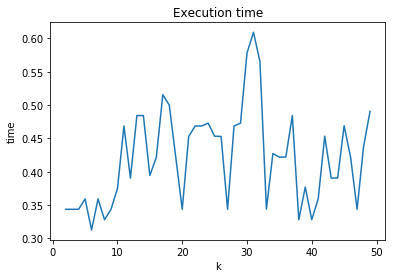

best k with silhouette coefficient:  2
best k with DB index:  4
best k with Calinski and Harabasz index:  16


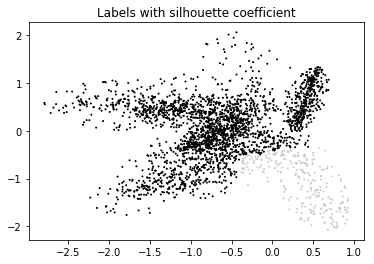

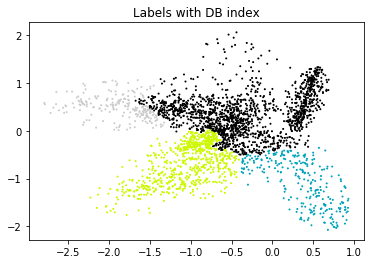

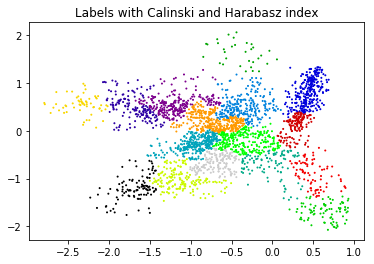

Dataset: cure-t2-4k
	x's type is numeric
	y's type is numeric
	class's type is nominal, range is ('0', '1', '2', '3', '4', '5', 'noise')

Linkage: ward


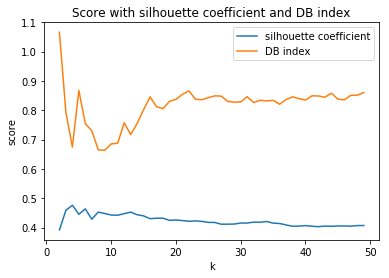

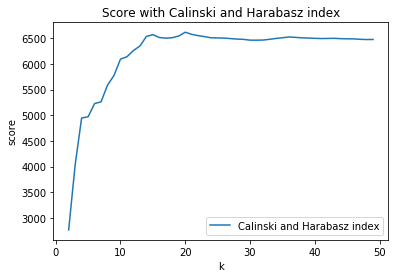

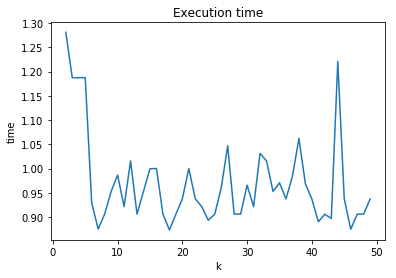

best k with silhouette coefficient:  4
best k with DB index:  9
best k with Calinski and Harabasz index:  20


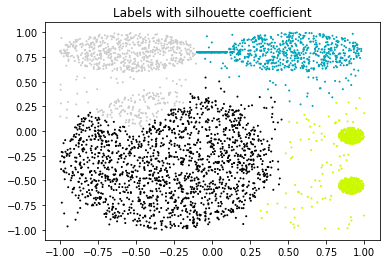

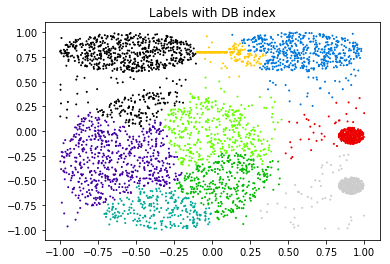

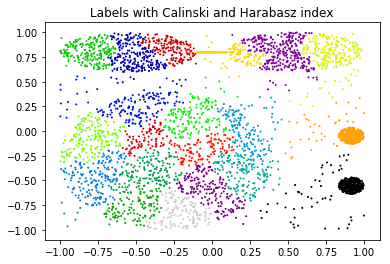

Linkage: single


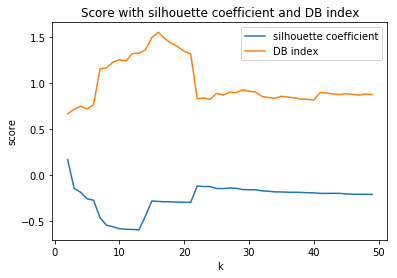

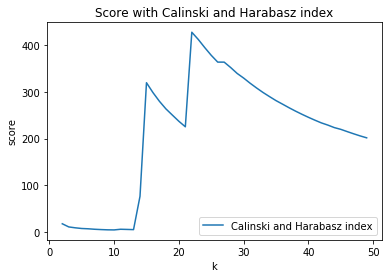

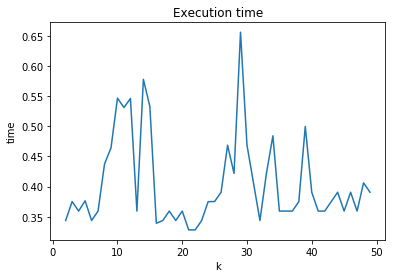

best k with silhouette coefficient:  2
best k with DB index:  2
best k with Calinski and Harabasz index:  22


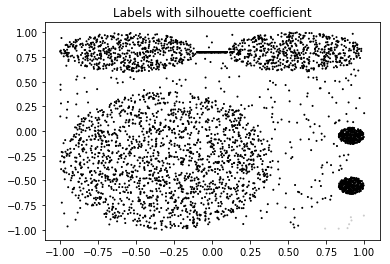

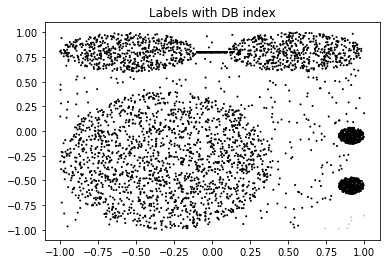

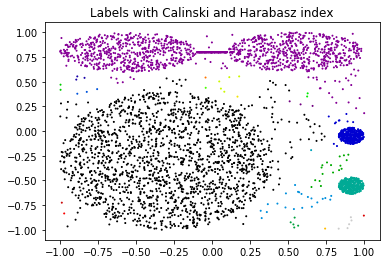

Linkage: average


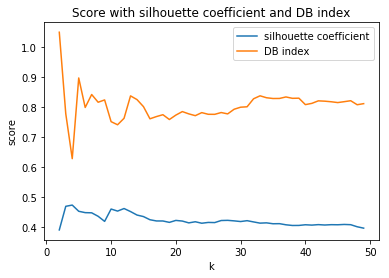

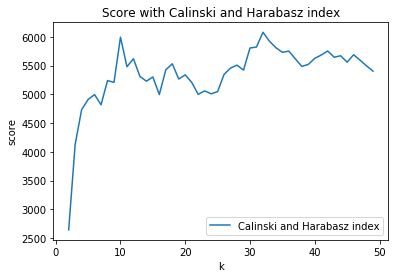

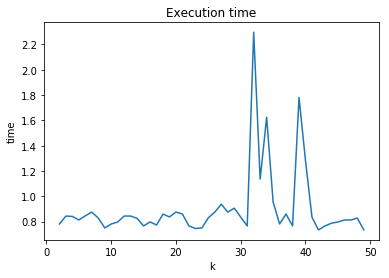

best k with silhouette coefficient:  4
best k with DB index:  4
best k with Calinski and Harabasz index:  32


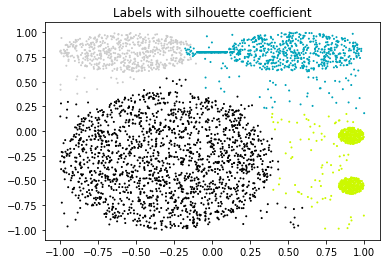

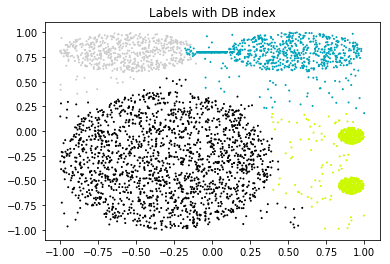

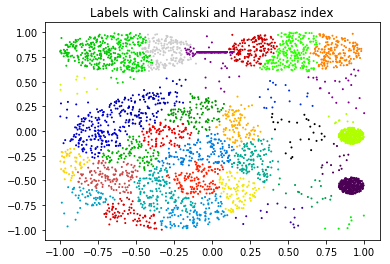

Linkage: complete


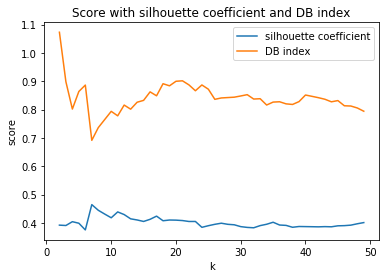

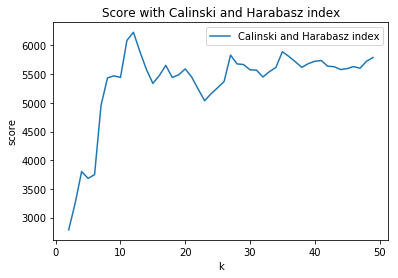

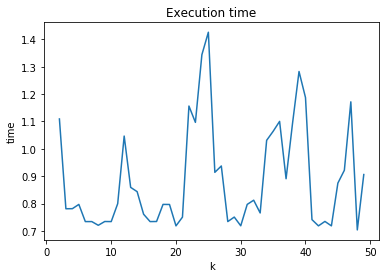

best k with silhouette coefficient:  7
best k with DB index:  7
best k with Calinski and Harabasz index:  12


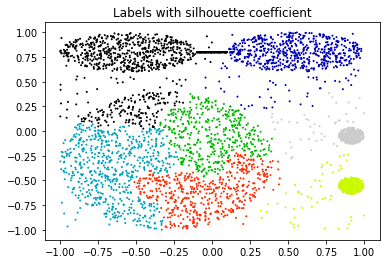

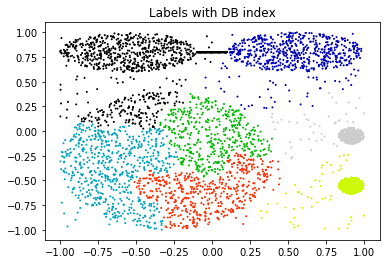

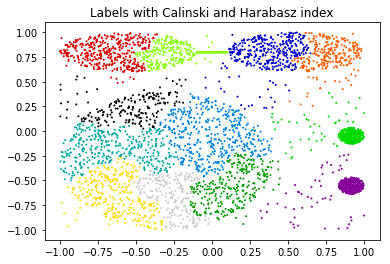

Dataset: square5
	a0's type is numeric
	a1's type is numeric
	class's type is nominal, range is ('0', '1', '2', '3')

Linkage: ward


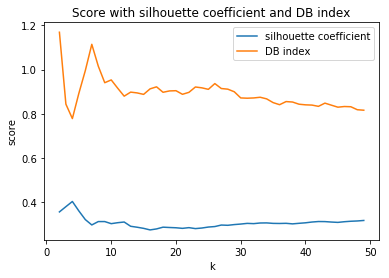

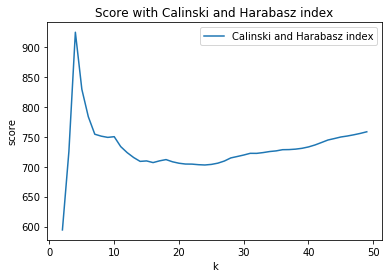

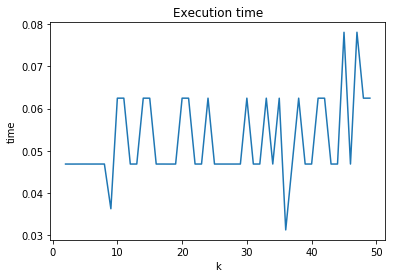

best k with silhouette coefficient:  4
best k with DB index:  4
best k with Calinski and Harabasz index:  4


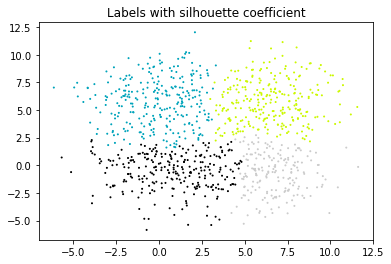

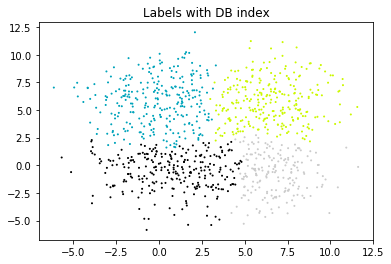

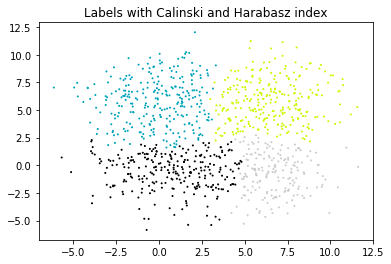

Linkage: single


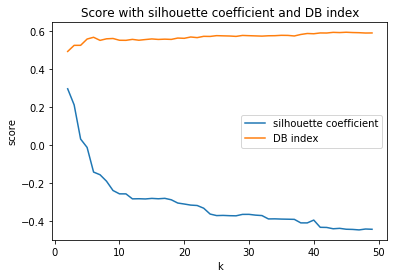

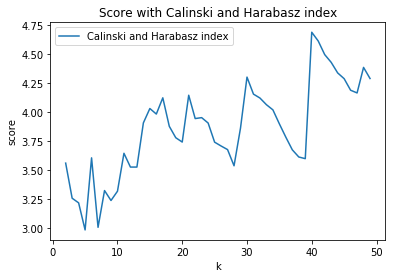

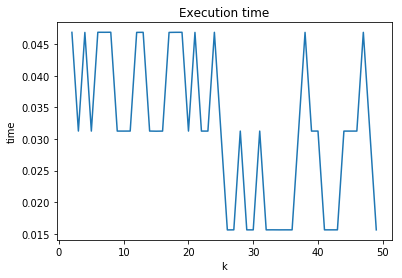

best k with silhouette coefficient:  2
best k with DB index:  2
best k with Calinski and Harabasz index:  40


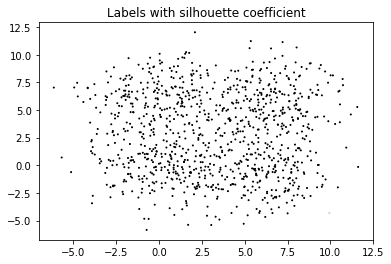

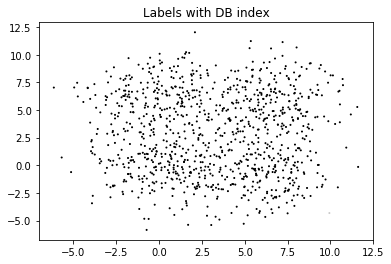

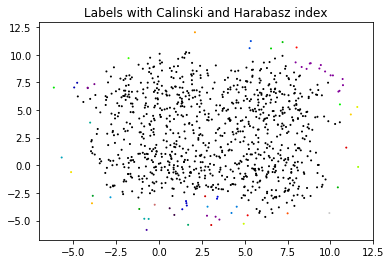

Linkage: average


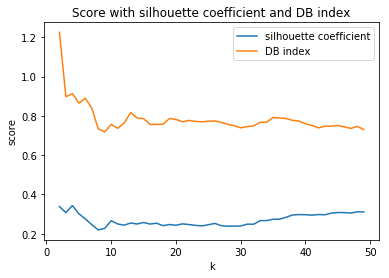

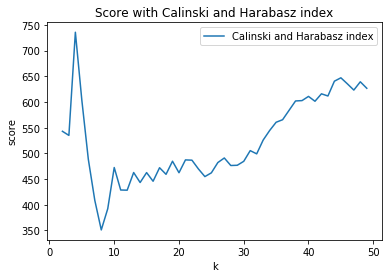

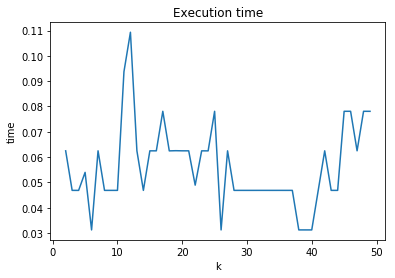

best k with silhouette coefficient:  4
best k with DB index:  9
best k with Calinski and Harabasz index:  4


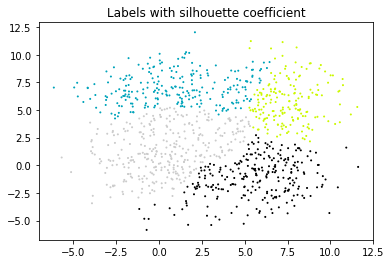

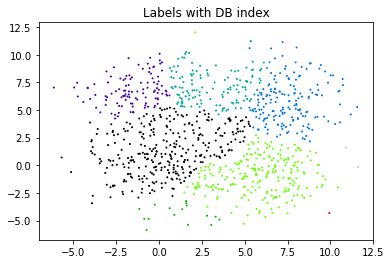

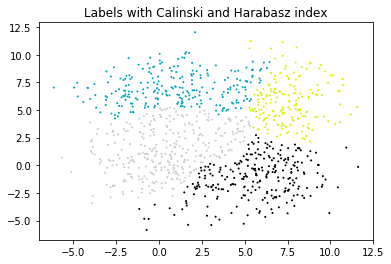

Linkage: complete


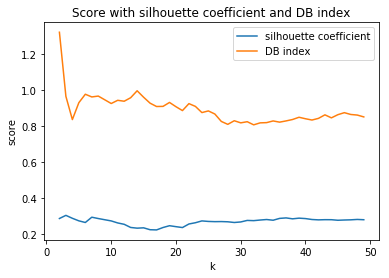

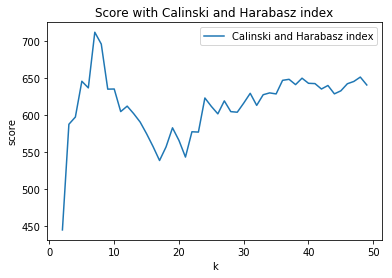

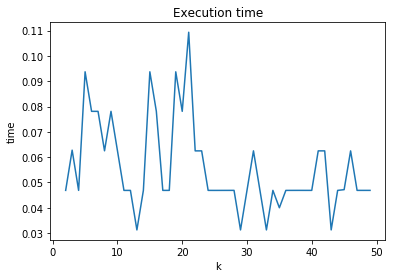

best k with silhouette coefficient:  3
best k with DB index:  32
best k with Calinski and Harabasz index:  7


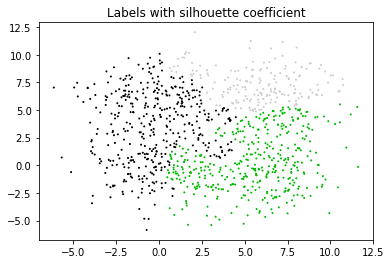

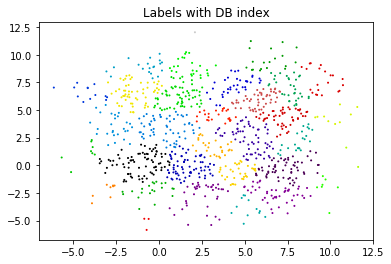

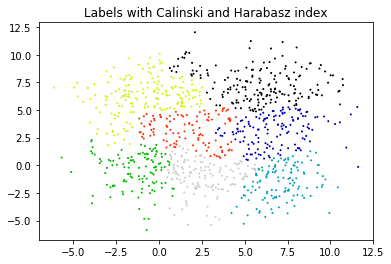

Dataset: Rings
	x's type is numeric
	y's type is numeric
	class's type is nominal, range is ('0', '1', '2')

Linkage: ward


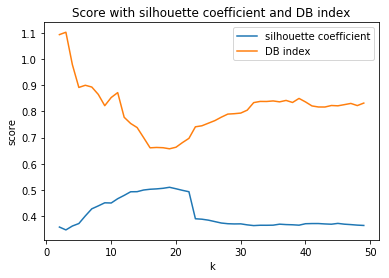

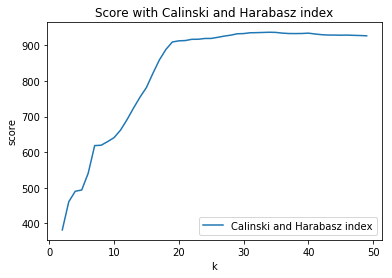

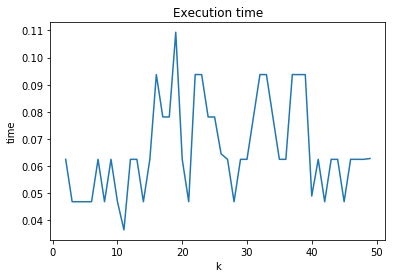

best k with silhouette coefficient:  19
best k with DB index:  19
best k with Calinski and Harabasz index:  34


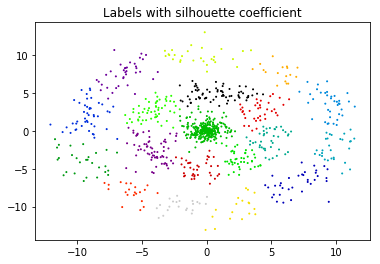

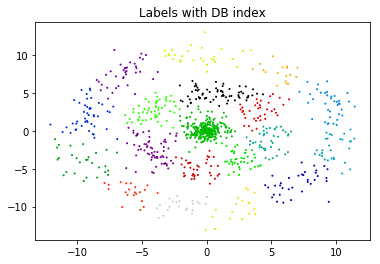

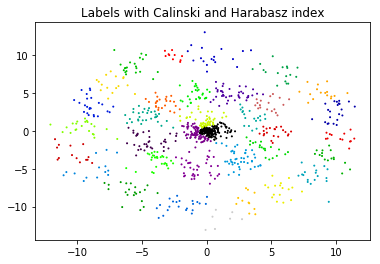

Linkage: single


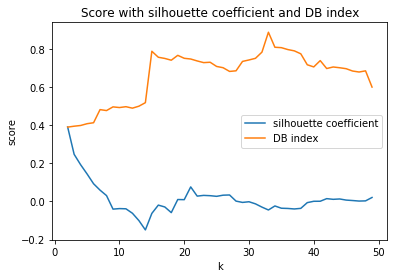

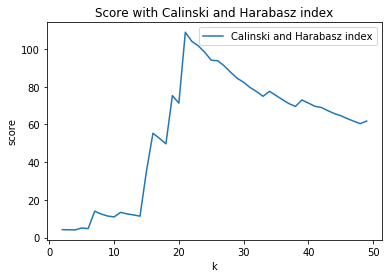

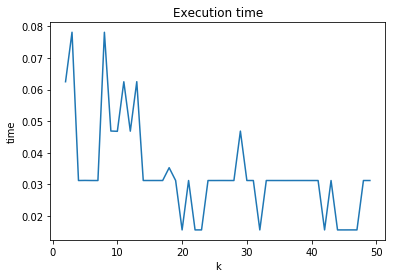

best k with silhouette coefficient:  2
best k with DB index:  2
best k with Calinski and Harabasz index:  21


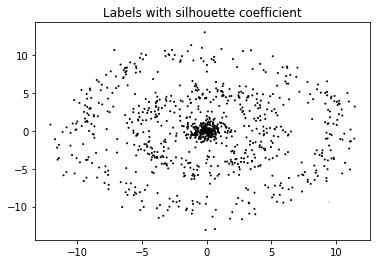

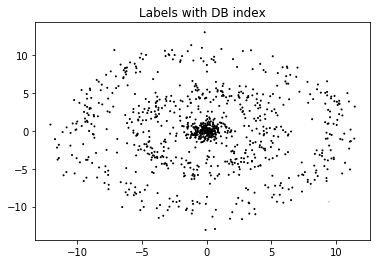

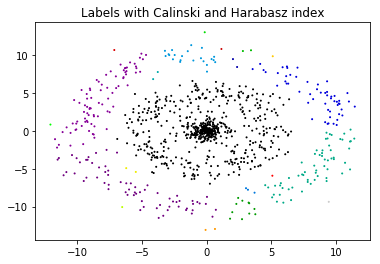

Linkage: average


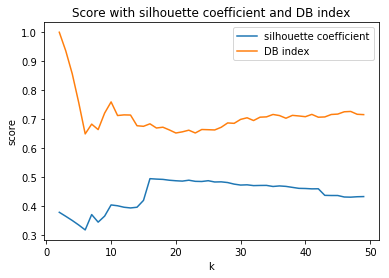

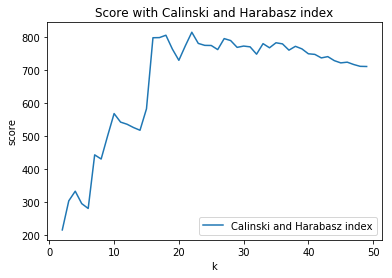

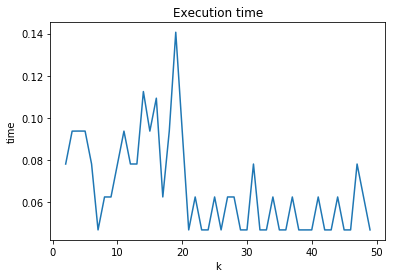

best k with silhouette coefficient:  16
best k with DB index:  6
best k with Calinski and Harabasz index:  22


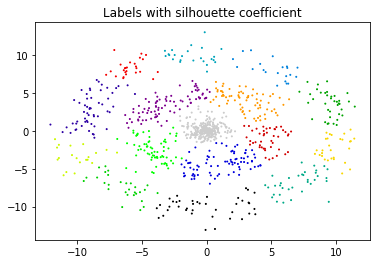

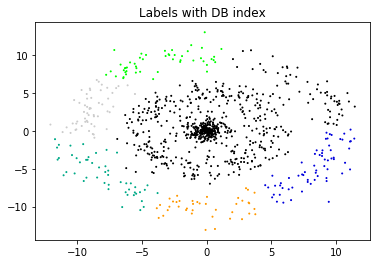

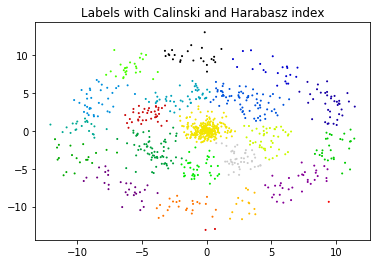

Linkage: complete


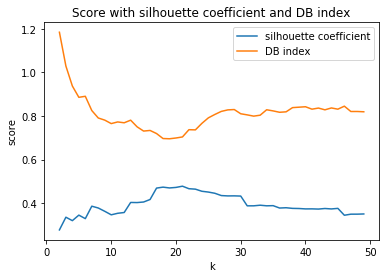

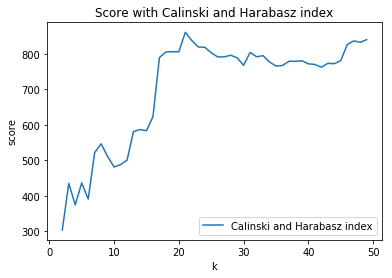

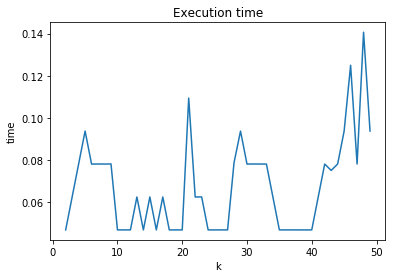

best k with silhouette coefficient:  21
best k with DB index:  19
best k with Calinski and Harabasz index:  21


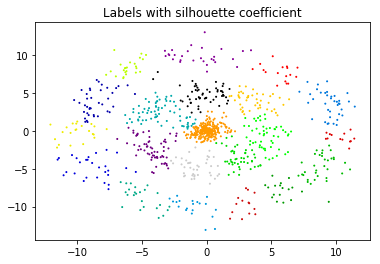

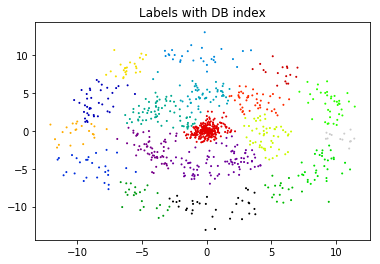

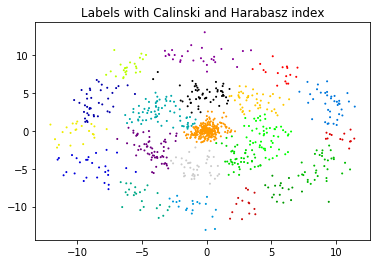

Dataset: disk-1000n
	x's type is numeric
	y's type is numeric
	class's type is nominal, range is ('0', '1')

Linkage: ward


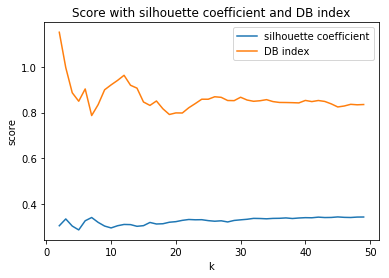

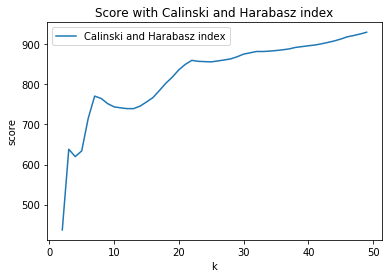

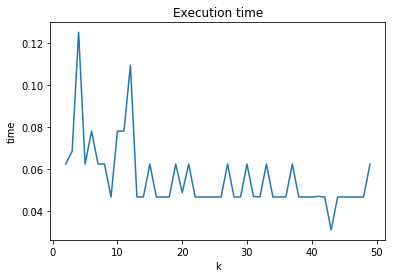

best k with silhouette coefficient:  45
best k with DB index:  7
best k with Calinski and Harabasz index:  49


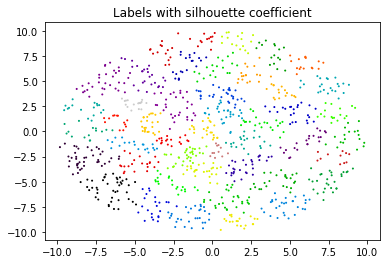

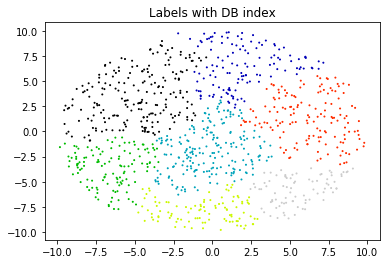

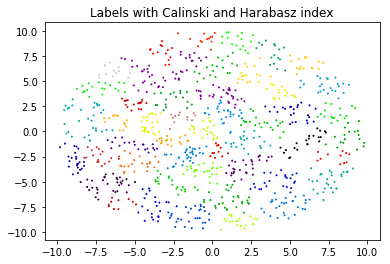

Linkage: single


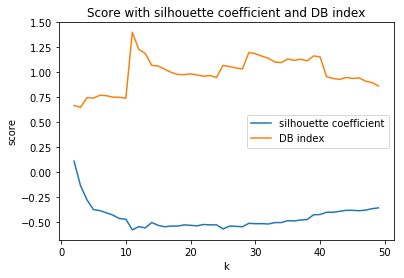

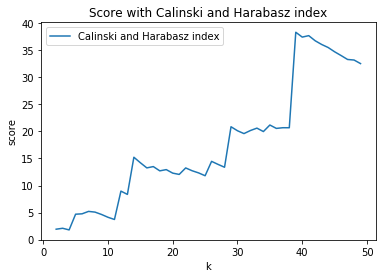

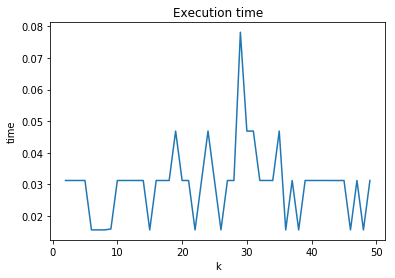

best k with silhouette coefficient:  2
best k with DB index:  3
best k with Calinski and Harabasz index:  39


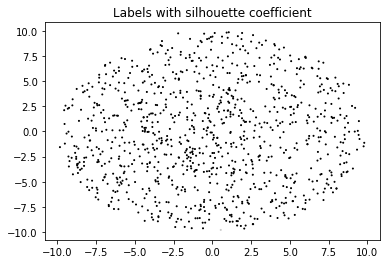

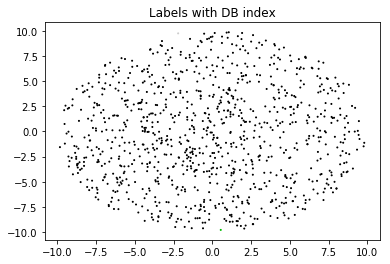

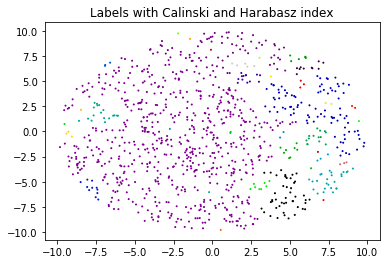

Linkage: average


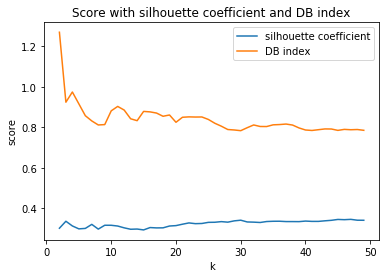

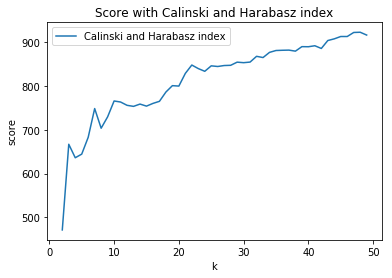

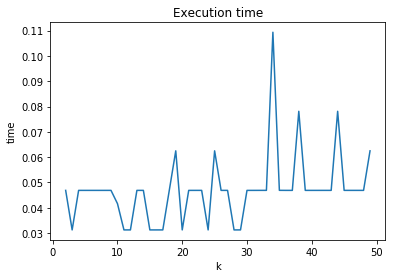

best k with silhouette coefficient:  47
best k with DB index:  30
best k with Calinski and Harabasz index:  48


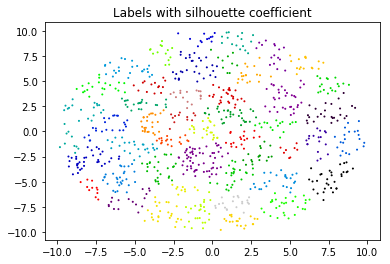

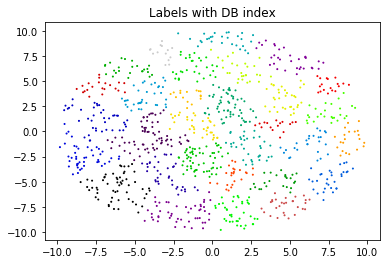

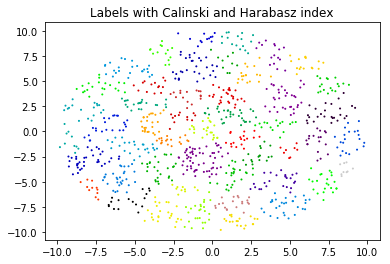

Linkage: complete


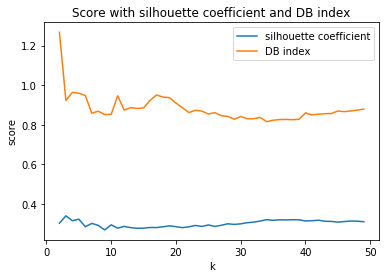

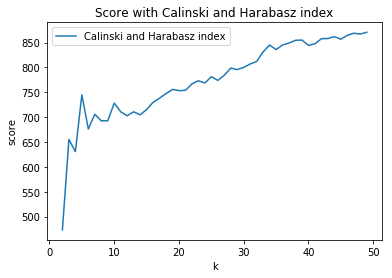

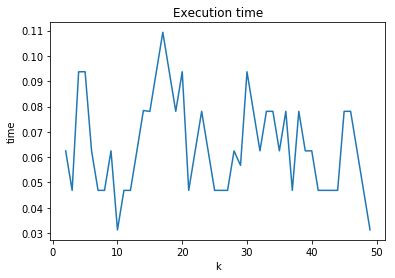

best k with silhouette coefficient:  3
best k with DB index:  34
best k with Calinski and Harabasz index:  49


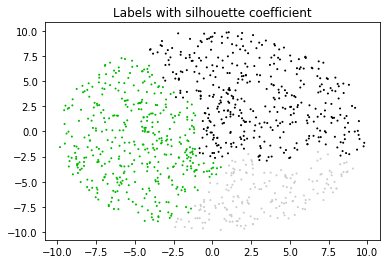

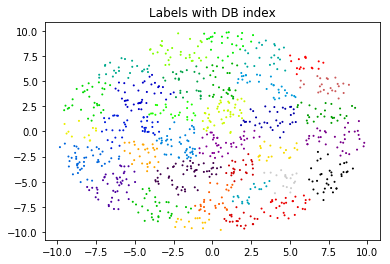

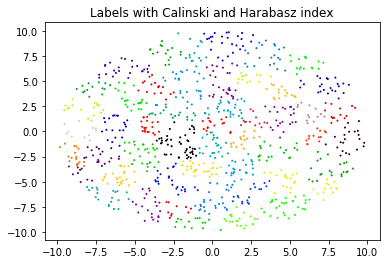

In [12]:
# Clustering agglomeratif avec les différentes méthodes de combinaison de clusters
for i in range(len(data)):
    dataset = data[i]
    meta = metadata[i]
    print(meta)
    for combi in ['ward','single','average','complete']:
        print("Linkage:", combi)
        ((k_sil,k_db,k_chi),labels) = agglo_iteratif(dataset,combi)
        print("best k with silhouette coefficient: ", k_sil)
        print("best k with DB index: ", k_db)
        print("best k with Calinski and Harabasz index: ", k_chi)

        best_labels_sil = labels[k_sil-2]
        best_labels_db = labels[k_db-2]
        best_labels_chi = labels[k_chi-2]

        plt.scatter(dataset[meta.names()[0]],
                        dataset[meta.names()[1]],
                        c = best_labels_sil,
                        s = 1, cmap = 'nipy_spectral')
        plt.title("Labels with silhouette coefficient")
        plt.show()

        plt.scatter(dataset[meta.names()[0]],
                        dataset[meta.names()[1]],
                        c = best_labels_db,
                        s = 1, cmap = 'nipy_spectral')
        plt.title("Labels with DB index")
        plt.show()

        plt.scatter(dataset[meta.names()[0]],
                        dataset[meta.names()[1]],
                        c = best_labels_chi,
                        s = 1, cmap = 'nipy_spectral')
        plt.title("Labels with Calinski and Harabasz index")
        plt.show()
